In [23]:
import spacy
import matplotlib.pyplot as plt
from heapq import nlargest
import pandas as pd


In [3]:
nlp = spacy.load("en_core_web_md")

In [4]:
from docx import Document

In [5]:
document = Document('./../Bachelor_Thesis_stefan.docx')

In [13]:
paragraphs = document.paragraphs
text = ''

for i, p in enumerate(paragraphs):
    #if len(p.text) > 100:
    text += p.text

In [14]:
doc = nlp(text)

In [15]:
for ent in doc.ents: 
    print(ent.text, ent.label_)

Linde ORG
20.04.2023fromStefan Kuchenbauer FAC
StatementThe ORG
Linde plc ORG
Dublin GPE
AbstractLorem Ipsum PERSON
ManagementCyl ORG
Department of Defense Architecture FrameworkEA	Enterprise ORG
DM	IT ORG
Ministry of Defence Architecture ORG
NATO ORG
Organisation for Economic Co-Operation ORG
1 CARDINAL
Linde plc ORG
Linde ORG
Enterprise Architecture ORG
EA ORG
The Open Group Architecture Framework ORG
TOGAF ORG
BC PRODUCT
Germany GPE
Korea GPE
BC ORG
Linde ORG
Linde ORG
Korea GPE
Linde ORG
BC ORG
Enterprise Architecture ORG
this Bachelor Thesis WORK_OF_ART
1 CARDINAL
Chapter 2 LAW
chapter 3 LAW
TOGAF ORG
BC Management ORG
chapter 4 LAW
Digital Collection ORG
Google Scholar ORG
SpringerLink ORG
second ORDINAL
Linde plc ORG
Chapter 5 LAW
BC ORG
BC GPE
BC PRODUCT
four CARDINAL
TOGAF ORG
Korea GPE
Germany GPE
two CARDINAL
Linde ORG
BC ORG
Linde ORG
BC ORG
2 CARDINAL
GovernanceThe ORG
Germany GPE
the German Corporate Governance Code ORG
the Federal Ministry of Justice ORG
the early two-th

In [16]:
ents = {}

for ent in doc.ents:
    if ent.text in ents.keys():
        ents[ent.text] +=  1
    else:
        ents[ent.text] = 1




In [17]:
ents

{'Linde': 70,
 '20.04.2023fromStefan Kuchenbauer': 1,
 'StatementThe': 1,
 'Linde plc': 13,
 'Dublin': 1,
 'AbstractLorem Ipsum': 1,
 'ManagementCyl': 1,
 'Department of Defense Architecture FrameworkEA\tEnterprise': 1,
 'DM\tIT': 1,
 'Ministry of Defence Architecture': 1,
 'NATO': 2,
 'Organisation for Economic Co-Operation': 1,
 '1': 9,
 'Enterprise Architecture': 2,
 'EA': 53,
 'The Open Group Architecture Framework': 2,
 'TOGAF': 44,
 'BC': 87,
 'Germany': 25,
 'Korea': 28,
 'this Bachelor Thesis': 1,
 'Chapter 2': 1,
 'chapter 3': 1,
 'BC Management': 2,
 'chapter 4': 2,
 'Digital Collection': 1,
 'Google Scholar': 1,
 'SpringerLink': 1,
 'second': 3,
 'Chapter 5': 1,
 'four': 12,
 'two': 30,
 '2': 9,
 'GovernanceThe': 1,
 'the German Corporate Governance Code': 2,
 'the Federal Ministry of Justice': 1,
 'the early two-thousands': 1,
 'German': 3,
 'European': 1,
 'the European Corporate Governance Forum': 1,
 'the Organisation for Economic Co-Operation and Development': 1,
 'OECD

In [21]:
ent_arr = nlargest(20, ents, key=ents.get)

In [24]:
data  = [[x, ents[x]] for x in ent_arr]

In [25]:
data

[['BC', 87],
 ['Linde', 70],
 ['EA', 53],
 ['TOGAF', 44],
 ['two', 30],
 ['Korea', 28],
 ['Germany', 25],
 ['SG', 19],
 ['PGP Germany', 16],
 ['first', 15],
 ['XY', 15],
 ['ADM', 14],
 ['IG', 14],
 ['Linde plc', 13],
 ['SAP', 13],
 ['four', 12],
 ['three', 11],
 ['1', 9],
 ['2', 9],
 ['PGP', 8]]

In [29]:
df = pd.DataFrame(data=data, columns=['Entity', 'Occurences'], index=ent_arr)

<Axes: >

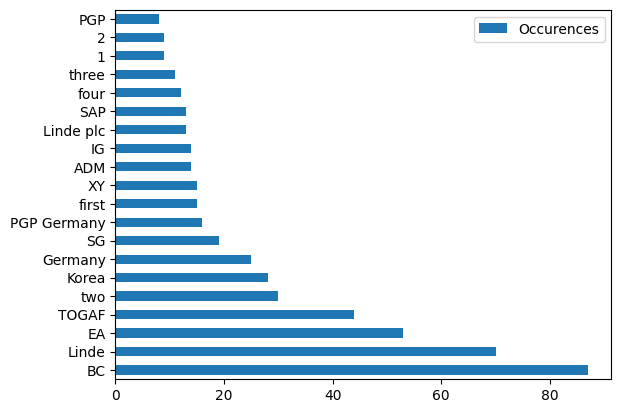

In [30]:
df.plot.barh()